# Lead Scoring Case Study

### Table of Contents:
1. Business Problem
2. Analysis Objectives
4. Data Understanding
5. Data Cleaning and Handling\
    4.1 Handling missing values\
    4.2 Handling outliers
5. Exploratory Data Analysis\
    5.1 Univariate analysis with Target Variable\
    5.1.1 Categorical variables\
    5.1.2 Binary Variables\
    5.1.3 Numerical Variables\
    5.2 Bivariable Analysis
6. Data Preparation\
    6.1 Drop unimportance variables\
    6.2 Convert binary variable Yes/No to 0/1\
    6.3 Dummy variables\
    6.4 Correlation\
    6.5. Test-Train Split\
    6.6 Feature Scalling
7. Model Building\
    7.1 Feature Selection\
    7.2 Plotting the ROC Curve\
    7.3 Finding Optimal Cutoff Point\
    7.4 Precision and recall tradeoff\
    7.5 Assigning Lead Score
8. Model Evaluation


## 1. Business Problem

X Education sells online courses to industry professionals who are interested in the courses. They land on their website and browse for courses. They market their courses on several websites and search engines like Google. When customers land on the website, they might browse the courses, fill out a form for the course, or watch some videos. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc.
Through this process, some of the leads get converted, while most do not. The typical lead conversion rate at X Education is around 30%. Although X Education gets a lot of leads, its lead conversion rate is very poor. They acquire 100 leads in a day, but only about 30 of them are converted.

## 2. Analysis Objectives

X Education has appointed you to help them select the most promising leads, i.e., the leads that are most likely to convert into paying customers.
The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark estimate of the target lead conversion rate at around 80%.


## 3. Data Understanding

In [1]:
## Import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


pd.set_option('mode.chained_assignment', None)      
pd.set_option('display.max_colwidth', None)         
pd.set_option('display.max_columns', None)       

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the dataset
lead = pd.read_csv("Leads.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
lead.shape

(9240, 37)

In [4]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## 4. Data Cleanning and Handling

### 4.1 Handling missing values

In [6]:
#check null values
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
missing_values = round(100*(lead.isnull().sum()/len(lead)), 2)
missing_values

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [8]:
#dropping columns that have more than 45% of null values.
lead.drop(columns=missing_values[missing_values.values >= 45].index, inplace=True)

In [9]:
lead['Country'].value_counts(dropna= False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

There are 2461 missing data in the Country column. It also has 5 'unknown' values, therefore we can use this value instead of an otherwise to replace these missing numbers.

In [10]:
# handling missing values of country
lead['Country'].fillna('unknown', inplace= True)

In [11]:
lead['Specialization'].value_counts(dropna= False)

Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [12]:
len(lead[lead['Specialization'].isin([np.nan, 'Select'])])

3380

Beside missing values, there are 1942 'Select' values as no-meaning values, so we can handle them as missing values as well. The total number of these values accounted for around 36.7%, so we do not need to drop this column.

In [13]:
lead['Specialization'].fillna('No Specified', inplace= True )
lead['Specialization'] = lead['Specialization'].apply(lambda x: 'No Specified' if x == 'Select' else x)

In [14]:
lead['How did you hear about X Education'].value_counts(dropna= False)

Select                   5043
NaN                      2207
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [15]:
len(lead[lead['How did you hear about X Education'].isin([np.nan, 'Select'])])/len(lead)

0.7846320346320347

Because both missing values and 'Select' values accounted for approximately 78.4% of the total, we can remove this column.

In [16]:
lead = lead.drop(columns= ['How did you hear about X Education'], axis= 1)

In [17]:
lead['What is your current occupation'].value_counts(dropna= False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [18]:
lead['What is your current occupation'].fillna('Other', inplace= True)

In [19]:
lead['What matters most to you in choosing a course'].value_counts(dropna= False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [20]:
lead['What matters most to you in choosing a course'].fillna('Other', inplace= True)

In [21]:
lead['Tags'].value_counts(dropna= False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [22]:
lead['Tags'].fillna('Other', inplace= True)

In [23]:
lead['Lead Profile'].value_counts(dropna= False)

Select                         4146
NaN                            2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [24]:
len(lead[lead['Lead Profile'].isin([np.nan, 'Select'])])/len(lead)

0.7418831168831169

We can drop this column because of the high number of missing and no-meaning values.

In [25]:
lead = lead.drop(columns= ['Lead Profile'], axis= 1)

In [26]:
lead['City'].value_counts(dropna= False)

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [27]:
len(lead[lead['City'].isin([np.nan, 'Select'])])/len(lead)

0.3970779220779221

In [28]:
lead['City'].fillna('Unknown', inplace= True )
lead['City'] = lead['City'].apply(lambda x: 'Unknown' if x == 'Select' else x)

In [29]:
#check missing values of the dataset again
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

There are a small number of missing values in the dataset, so we can drop them as they don't significantly affect the dataset.

In [30]:
lead.dropna(inplace= True)

In [31]:
lead.shape

(9074, 30)

### 4.2 Handling Outliers

In [32]:
lead.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151
std,23348.029512,0.485053,4.858802,545.256560,2.160871
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
90%,650276.800000,1.000000,7.000000,1373.000000,5.000000
95%,655344.450000,1.000000,10.000000,1557.000000,6.000000
99%,659563.350000,1.000000,17.000000,1839.000000,9.000000


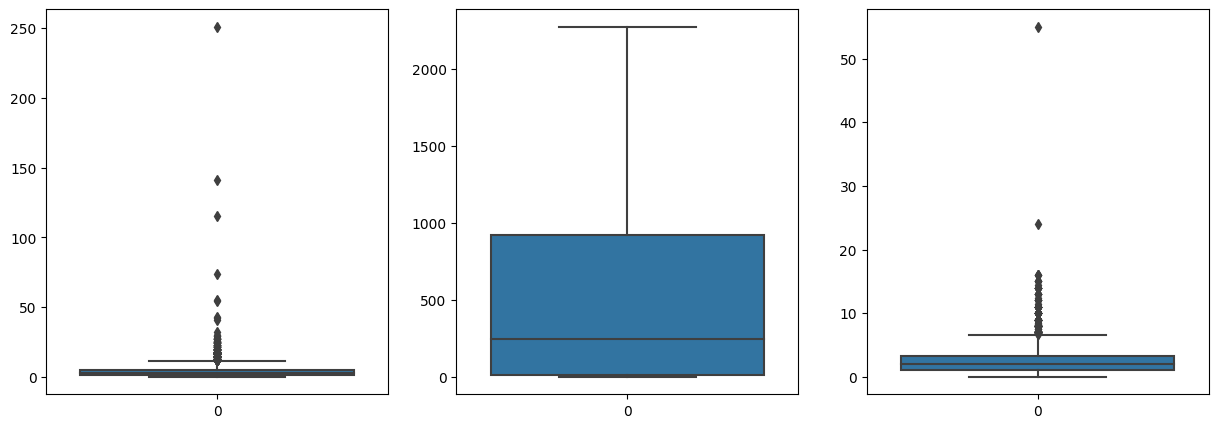

In [33]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
sns.boxplot(lead['TotalVisits'], ax= axs[0])
sns.boxplot(lead['Total Time Spent on Website'], ax= axs[1])
sns.boxplot(lead['Page Views Per Visit'], ax= axs[2])
plt.show()

TotalVists and Page Views Per Visit have outliers in the distribution displayed above. Because the difference between the 95% and 99% percentiles is insignificant, the outliers can be replaced with the 99% percentile value.

In [34]:
quantile_99_visit = lead['TotalVisits'].quantile(0.99)
lead['TotalVisits'] = np.where(lead['TotalVisits'] > quantile_99_visit, quantile_99_visit, lead['TotalVisits'])

In [35]:
quantile_99_pageview = lead['Page Views Per Visit'].quantile(0.99)
lead['Page Views Per Visit'] = np.where(lead['Page Views Per Visit'] > quantile_99_pageview, quantile_99_pageview, lead['Page Views Per Visit'])

In [36]:
lead.shape

(9074, 30)

Finally, we have a cleaned dataset contains 9074 rows and 30 columns

## 5. Exploratory Data Analysis

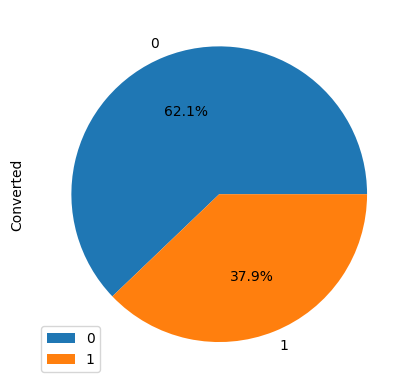

In [37]:
#check data imbalance
lead['Converted'].value_counts().plot.pie(autopct='%3.1f%%', legend = True)
plt.show()

Following the distribution above, the percentage of converted and not converted is not significantly different. So we can consider the dataset balanced.

### 5.1  Univariate analysis with Target Variable

### 5.1.1 Categorical variables

In [38]:
#Using def function to quickly plot the chart of each variable.
def plot_columns_1(lead, column):
    df = lead.groupby(by=[column, 'Converted']).size().reset_index(name='VALUE')
    df = pd.pivot_table(df, values='VALUE', index=column, columns='Converted', aggfunc=np.sum)
    ax = df.plot(kind='bar', stacked=False, fontsize=10, ax=axs[0])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)

In [39]:
def plot_columns_2(lead, column):
    lead.groupby(by=column)['Converted'].mean().sort_values(ascending=False).plot(kind='bar', ax=axs[1])
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.title("Conversion rate")

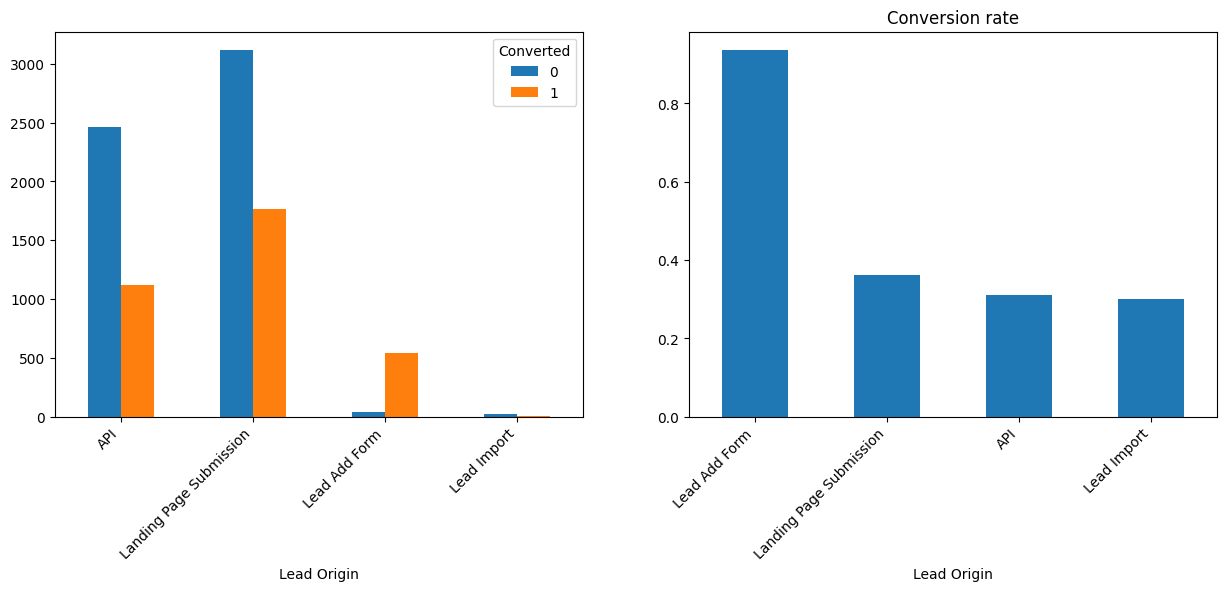

In [40]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
plot_columns_1(lead, 'Lead Origin')
plot_columns_2(lead, 'Lead Origin')

*Insights:*
Landing Page Submission and API are two identifiers that have the most leads but a low conversion rate, whereas Lead Add Form has the highest conversion rate. Based on that, we can recommend that the company should improve the conversion rate of the landing page and API, while drive more traffic to Lead Add Form. 

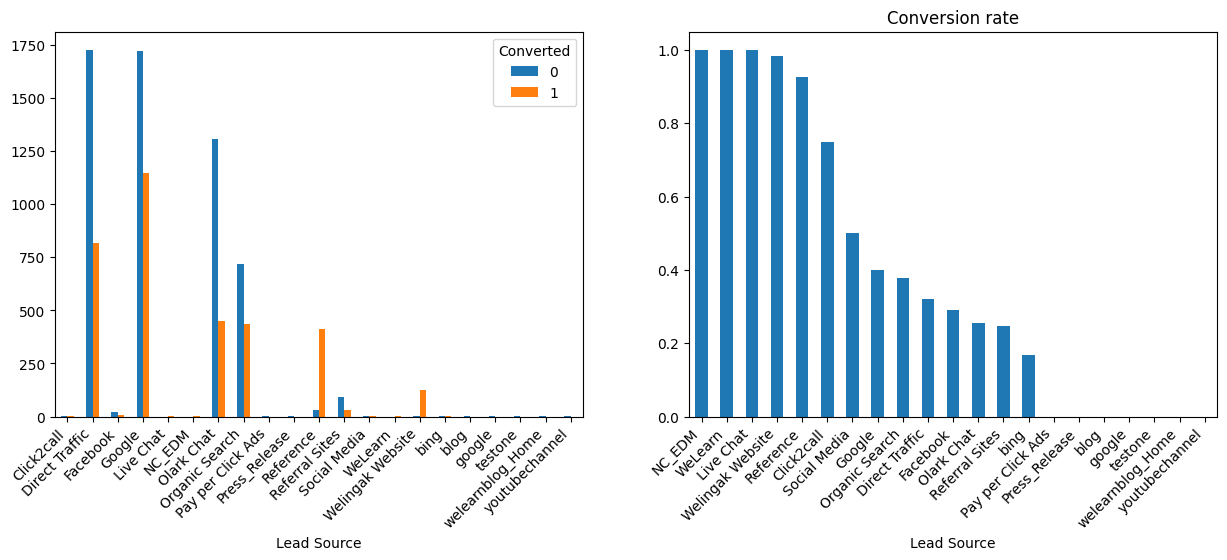

In [41]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
plot_columns_1(lead, 'Lead Source')
plot_columns_2(lead, 'Lead Source')

Most leads come from Direct Traffic, Google, Orlack Chat, and pay-per-click ads, but these channels don't have high conversion rates. The performance of these channels should be improved in the future. Reference is a reliable source with high conversion rate.

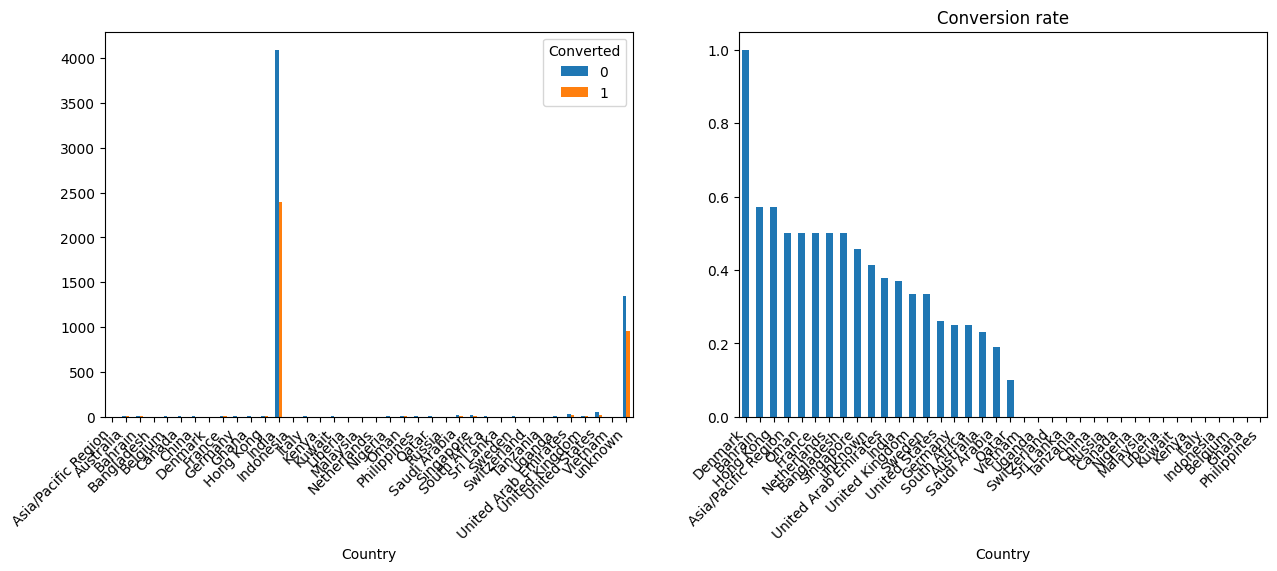

In [42]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
plot_columns_1(lead, 'Country')
plot_columns_2(lead, 'Country')

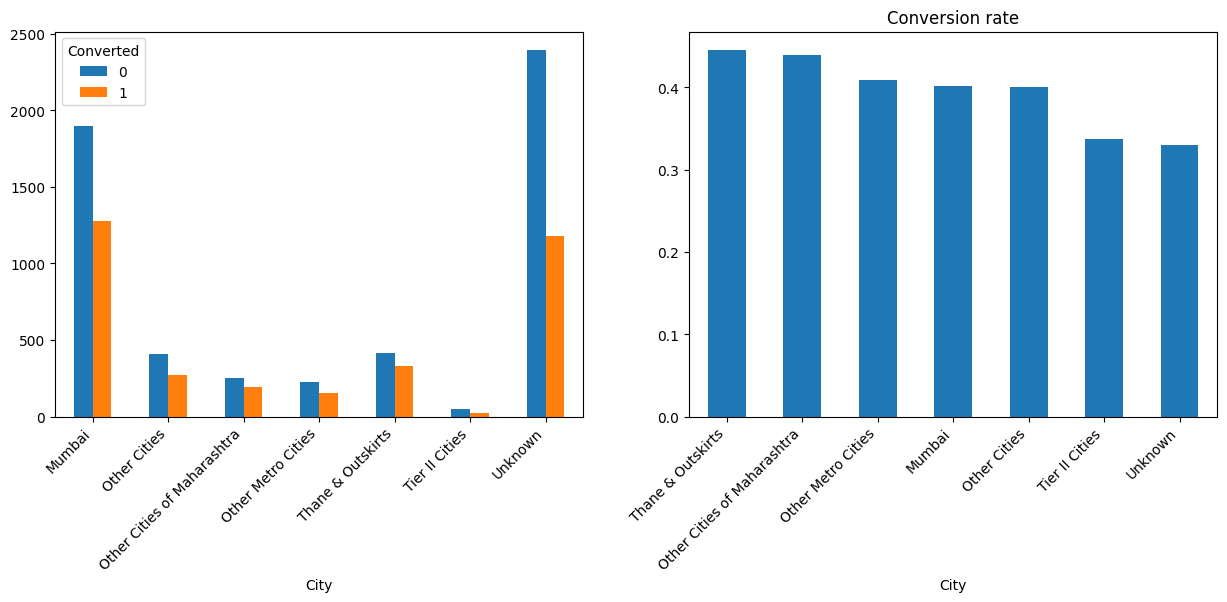

In [43]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
plot_columns_1(lead, 'City')
plot_columns_2(lead, 'City')

*Insights:* Combining the two variables Country and City, we can determine that the key market for the company is India. While most customers lived in Mumbai and other top-tier cities, the conversion rate decreased accordingly.

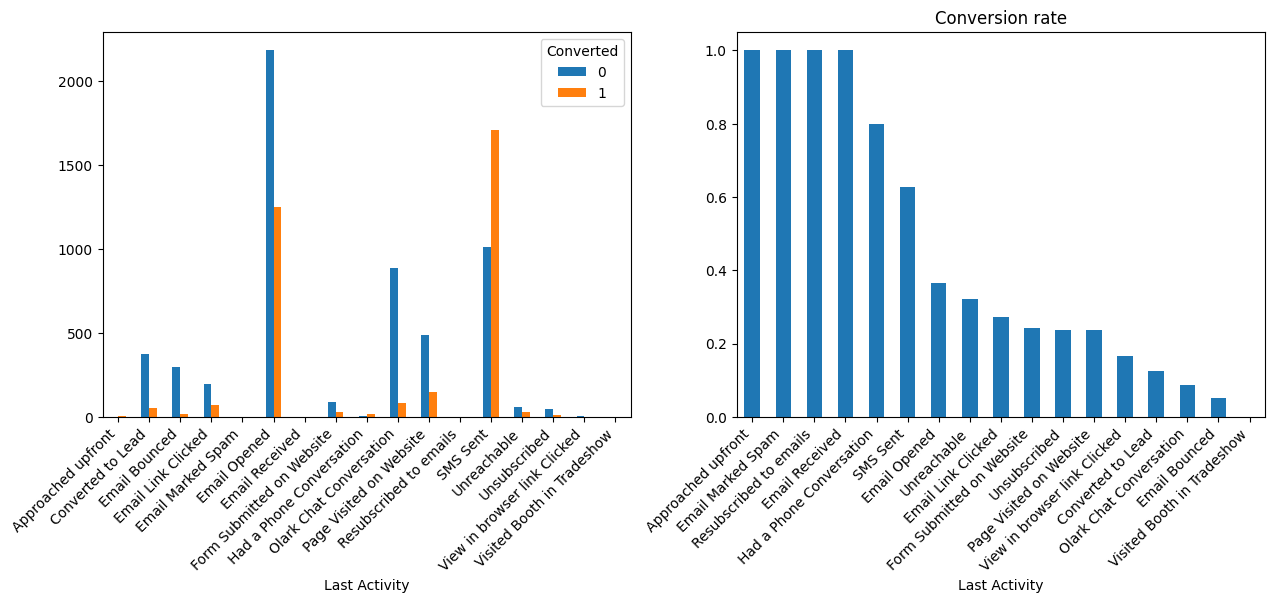

In [44]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
plot_columns_1(lead, 'Last Activity')
plot_columns_2(lead, 'Last Activity')

*Insight*: Following the distribution above, most customers engaged with Email, SMS, or Orlak Chat, but the group of customers who sent SMS had a higher conversion rate than the other two groups. It also demonstrated the behavior of customers interested in our online courses through the last activity they performed. For instance, customers who opened an email have a higher conversation rate than those who just received it. Customers who resubscribed to emails or had a phone conversation are more interested in our courses as well.

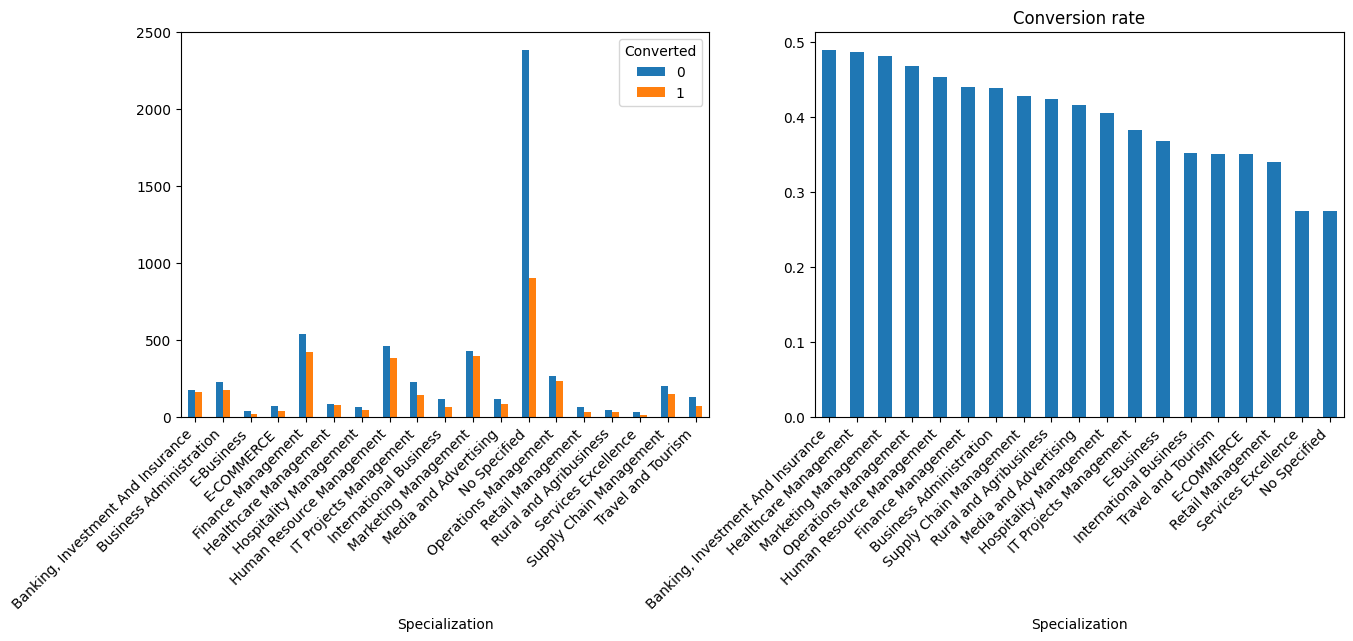

In [45]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
plot_columns_1(lead, 'Specialization')
plot_columns_2(lead, 'Specialization')

*Insight:* Most customers don't fill out their specialization in the form, but based on the current distribution, we can see some domains have a good conversation rate, such as Banking, investment, and Insurance, Healthcare management, and Marketing Management. It can be affected by the content of the company's online course.

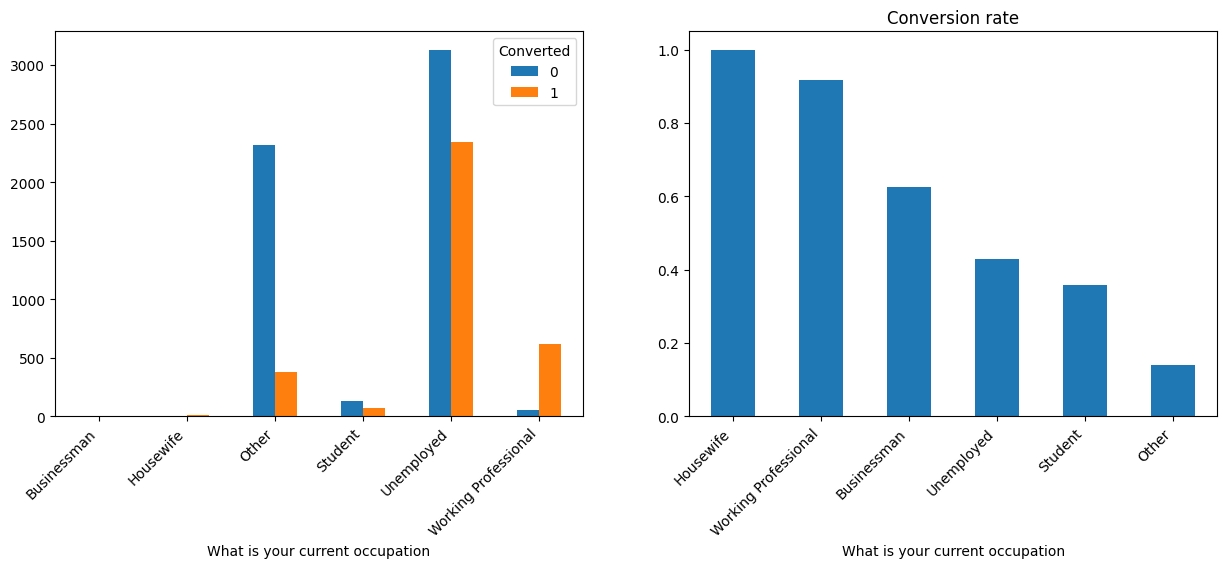

In [46]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
plot_columns_1(lead, 'What is your current occupation')
plot_columns_2(lead, 'What is your current occupation')

*Insight:* The company reached out to a high number of unemployed customers, but the conversation rate is still low. Instead of that, housewife, working professionals, and businessmen should be the main target audiences. The company should review their approach strategy.

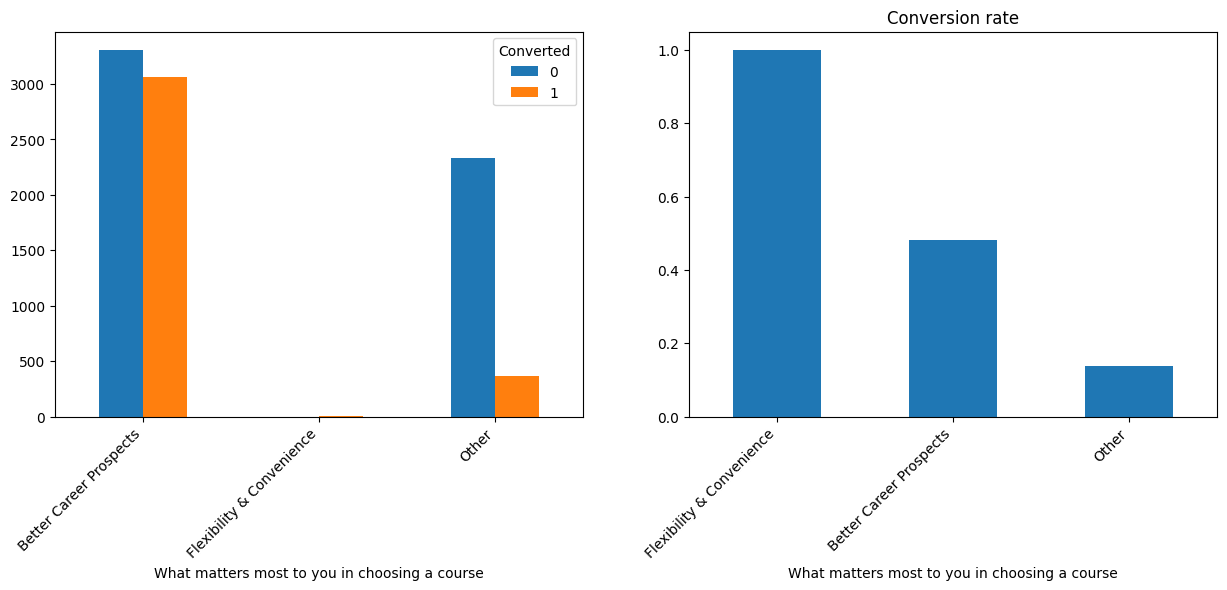

In [47]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
plot_columns_1(lead, 'What matters most to you in choosing a course')
plot_columns_2(lead, 'What matters most to you in choosing a course')

*Insight:* Most customers choose our online courses because they want better career prospects. However, the stronger reasons for converted leads are flexibility and convenience. It's also one of the advantages of studying online compared to other ways.

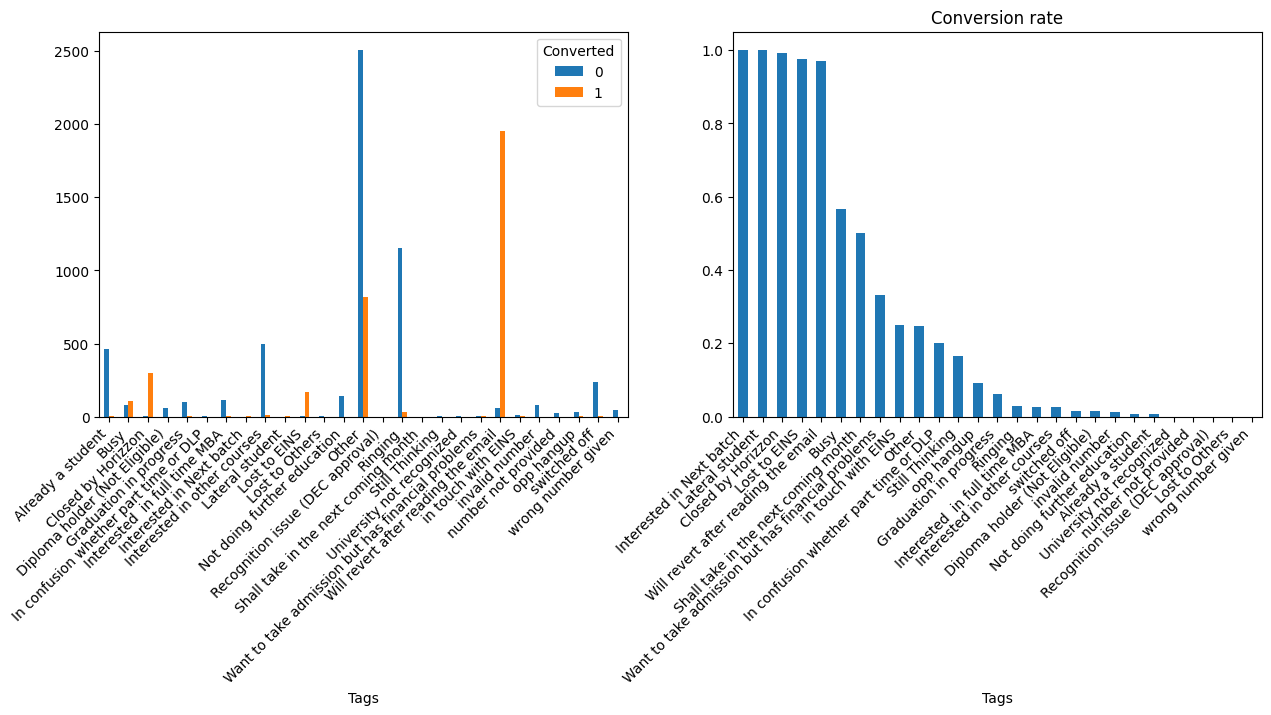

In [48]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
plot_columns_1(lead, 'Tags')
plot_columns_2(lead, 'Tags')

*Insight:* The distribution above reveals the top 5 customer statuses that the company should focus on, including 'Interested in next batch', 'Lateral student', 'Closed by Horizzon', 'Lost to EINS, and 'Will revert after reading the email'. Also, the most common current status for leads is 'Will revert after reading the email'. Customers should take care of this group to push conversion rate.

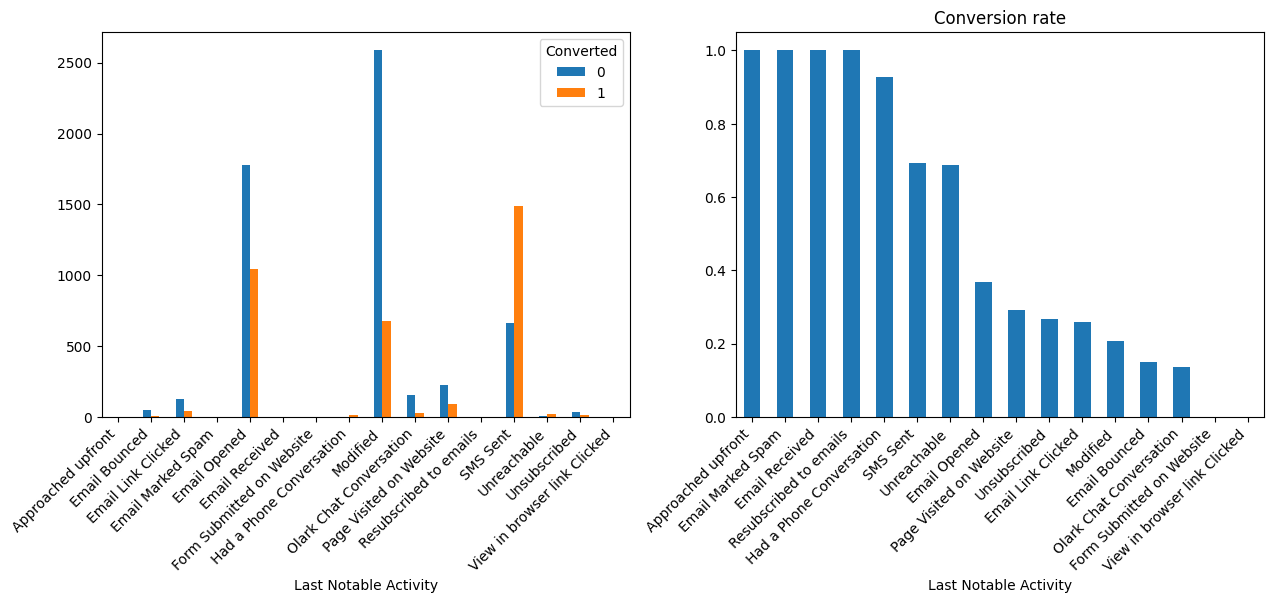

In [49]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
plot_columns_1(lead, 'Last Notable Activity')
plot_columns_2(lead, 'Last Notable Activity')

*Insight:* The behaviors of student's last activity are similar to the potential leads.

### 5.1.2 Binary Variables

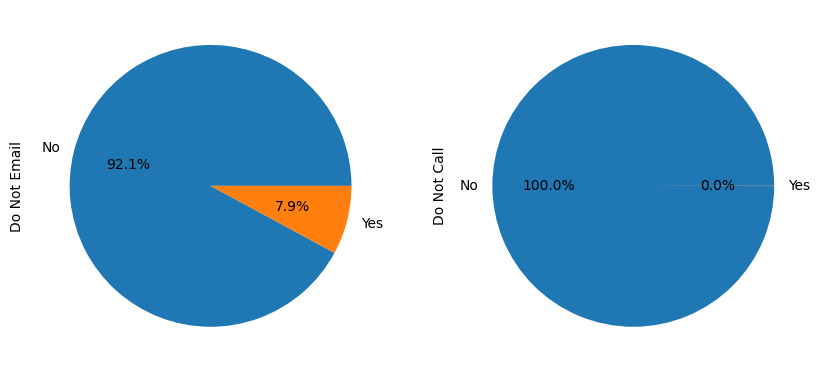

In [50]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))
lead['Do Not Email'].value_counts(normalize= True).plot.pie(autopct='%3.1f%%', ax = axs[0])
lead['Do Not Call'].value_counts(normalize= True).plot.pie(autopct='%3.1f%%', ax = axs[1])
plt.show()

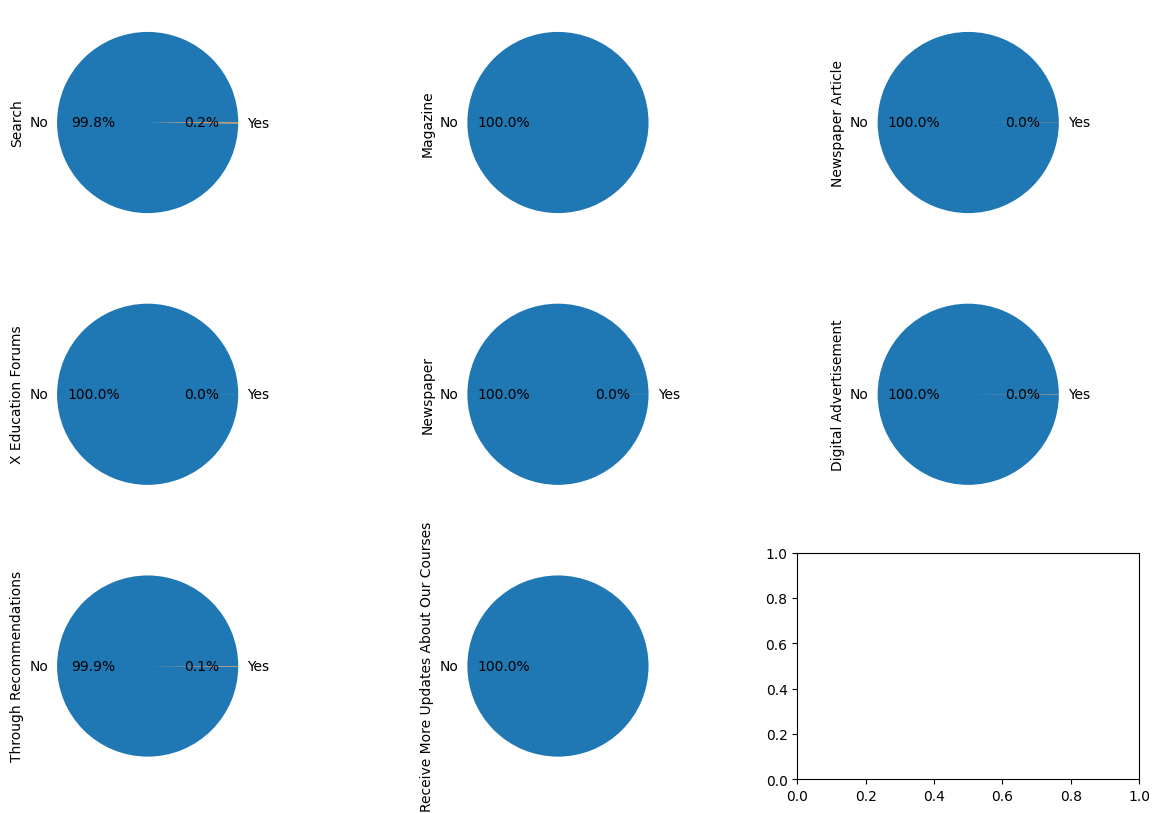

In [51]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
lead['Search'].value_counts(normalize= True).plot.pie(autopct='%3.1f%%', ax = axs[0,0])
lead['Magazine'].value_counts(normalize= True).plot.pie(autopct='%3.1f%%', ax = axs[0,1])
lead['Newspaper Article'].value_counts(normalize= True).plot.pie(autopct='%3.1f%%', ax = axs[0,2])
lead['X Education Forums'].value_counts(normalize= True).plot.pie(autopct='%3.1f%%', ax = axs[1,0])
lead['Newspaper'].value_counts(normalize= True).plot.pie(autopct='%3.1f%%', ax = axs[1,1])
lead['Digital Advertisement'].value_counts(normalize= True).plot.pie(autopct='%3.1f%%', ax = axs[1,2])
lead['Through Recommendations'].value_counts(normalize= True).plot.pie(autopct='%3.1f%%', ax = axs[2,0])
lead['Receive More Updates About Our Courses'].value_counts(normalize= True).plot.pie(autopct='%3.1f%%', ax = axs[2,1])
plt.show()

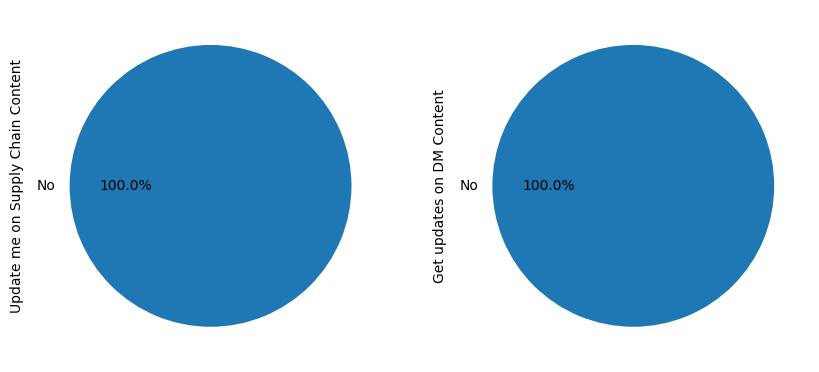

In [52]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))
lead['Update me on Supply Chain Content'].value_counts(normalize= True).plot.pie(autopct='%3.1f%%', ax = axs[0])
lead['Get updates on DM Content'].value_counts(normalize= True).plot.pie(autopct='%3.1f%%', ax = axs[1])
plt.show()

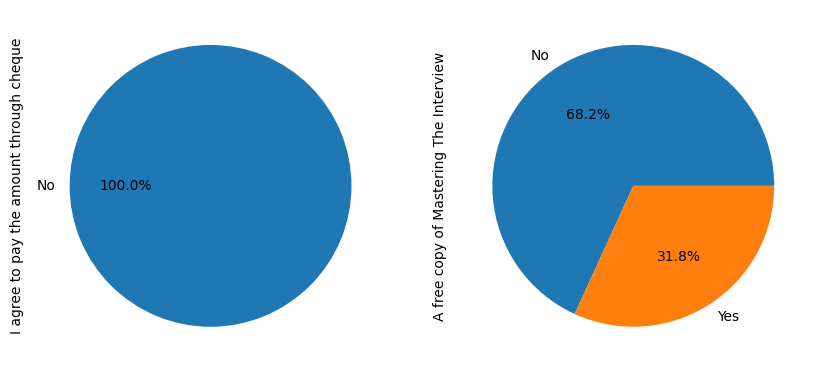

In [53]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))
lead['I agree to pay the amount through cheque'].value_counts(normalize= True).plot.pie(autopct='%3.1f%%', ax = axs[0])
lead['A free copy of Mastering The Interview'].value_counts(normalize= True).plot.pie(autopct='%3.1f%%', ax = axs[1])
plt.show()

*Insight:* Although we have too many binary variables, there are only two that are clearly classified. Most customers don't want to receive email about the course or free copy of 'Mastering the Interview'.

### 5.1.3 Numerical Variables

In [54]:
numerical_cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

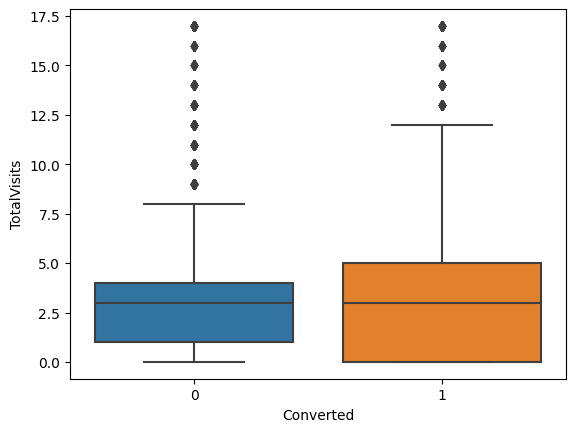

In [55]:
sns.boxplot(y='TotalVisits', x='Converted', data=lead)
plt.show()

*Insight:* Although the median of converted and non-converted leads is the same, we can determine that customers who are interested in our course will visit the website more often than those who are not.

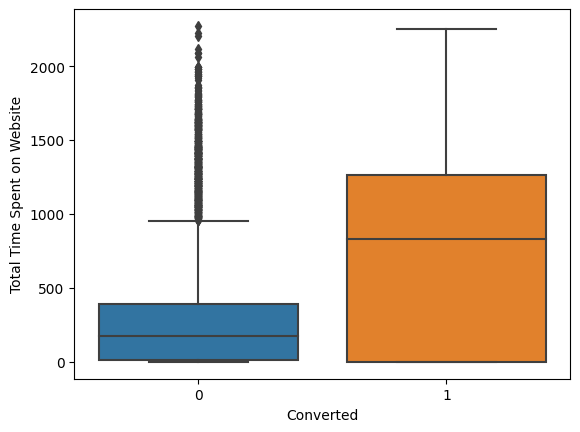

In [56]:
sns.boxplot(y='Total Time Spent on Website', x='Converted', data=lead)
plt.show()

*Insight:* The customers who are interested in our course spent more time on the landing page to carefully read the information.

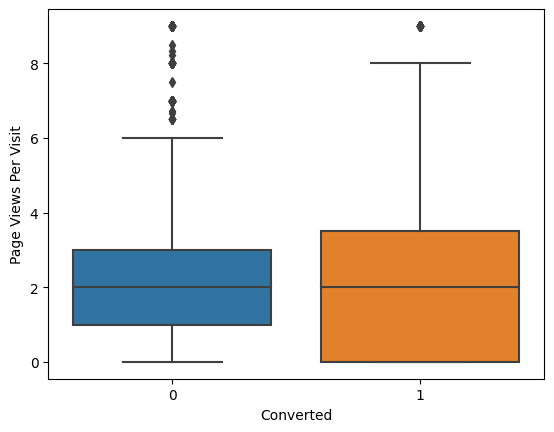

In [57]:
sns.boxplot(y='Page Views Per Visit', x='Converted', data=lead)
plt.show()

*Insight:* There is no significant difference between the average number of pages viewed during a visit by the two types of customers.

### 5.2 Bivariate Analysis

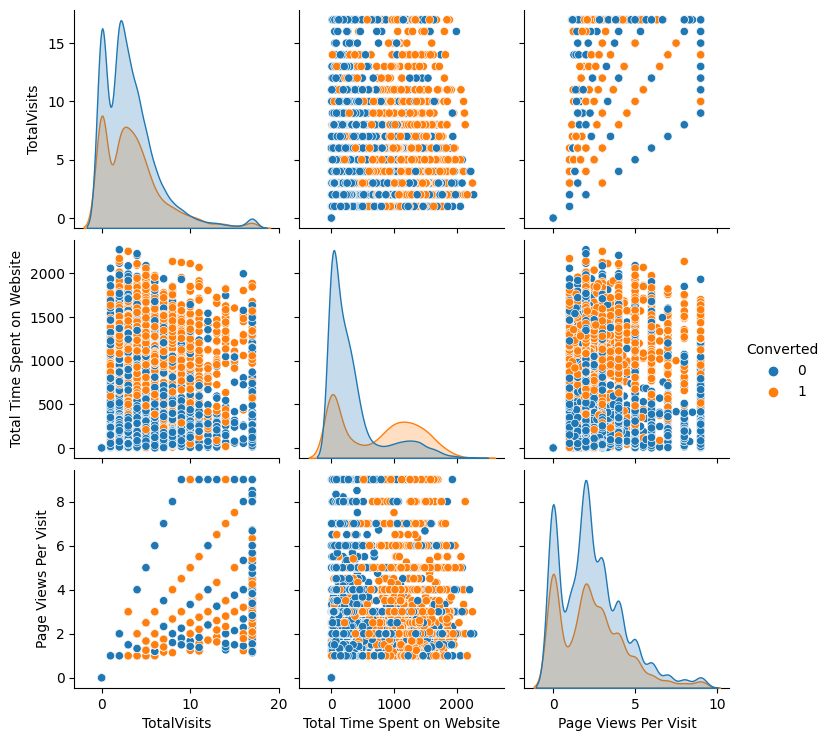

In [58]:
num_var = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

sns.pairplot(lead, vars=num_var, hue="Converted", kind="scatter")
plt.show()

*Insight:* There is a certain correlation between TotalVisits and Page Views Per Visit

## 6. Data Preparation

### 6.1 Drop unimportance variables:

In [59]:
#drop id columns
lead.drop(columns=['Prospect ID', 'Lead Number'], inplace=True)

In [60]:
#drop non-classified variables
non_classified_cols = ['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 
                        'Newspaper', 'Digital Advertisement','Through Recommendations',
                        'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content',
                        'I agree to pay the amount through cheque']

lead.drop(columns= non_classified_cols, inplace=True)

In [61]:
#drop Country columns as we defined that the main market is India
lead.drop(columns = 'Country', inplace = True)

In [62]:
#Drop Tags as it is marked by sales team after they contacted for potential leads. 
#Drop 'Last Notable Activity' as it indicates activity of students and it isn't our target audiences.
lead.drop(columns = ['Tags','Last Notable Activity'], inplace = True)

### 6.2 Convert binary variable Yes/No to 0/1

In [63]:
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

In [64]:
binary_list = ['Do Not Email', 'A free copy of Mastering The Interview']

lead[binary_list] = lead[binary_list].apply(binary_map)

### 6.3 Dummy variables

In [65]:
cat_var = ['Lead Origin', 'Lead Source','Last Activity','Specialization', 'What is your current occupation','What matters most to you in choosing a course',
            'City']

In [66]:
dummy = pd.get_dummies(lead[cat_var], drop_first=True)

In [67]:
lead_merged = pd.concat([lead, dummy], axis=1)

In [68]:
lead_merged.drop(columns = cat_var, inplace = True)

In [69]:
lead_merged.columns

Index(['Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Lead Source_blog', 'Lead Source_google',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Mar

### 6.4 Correlation

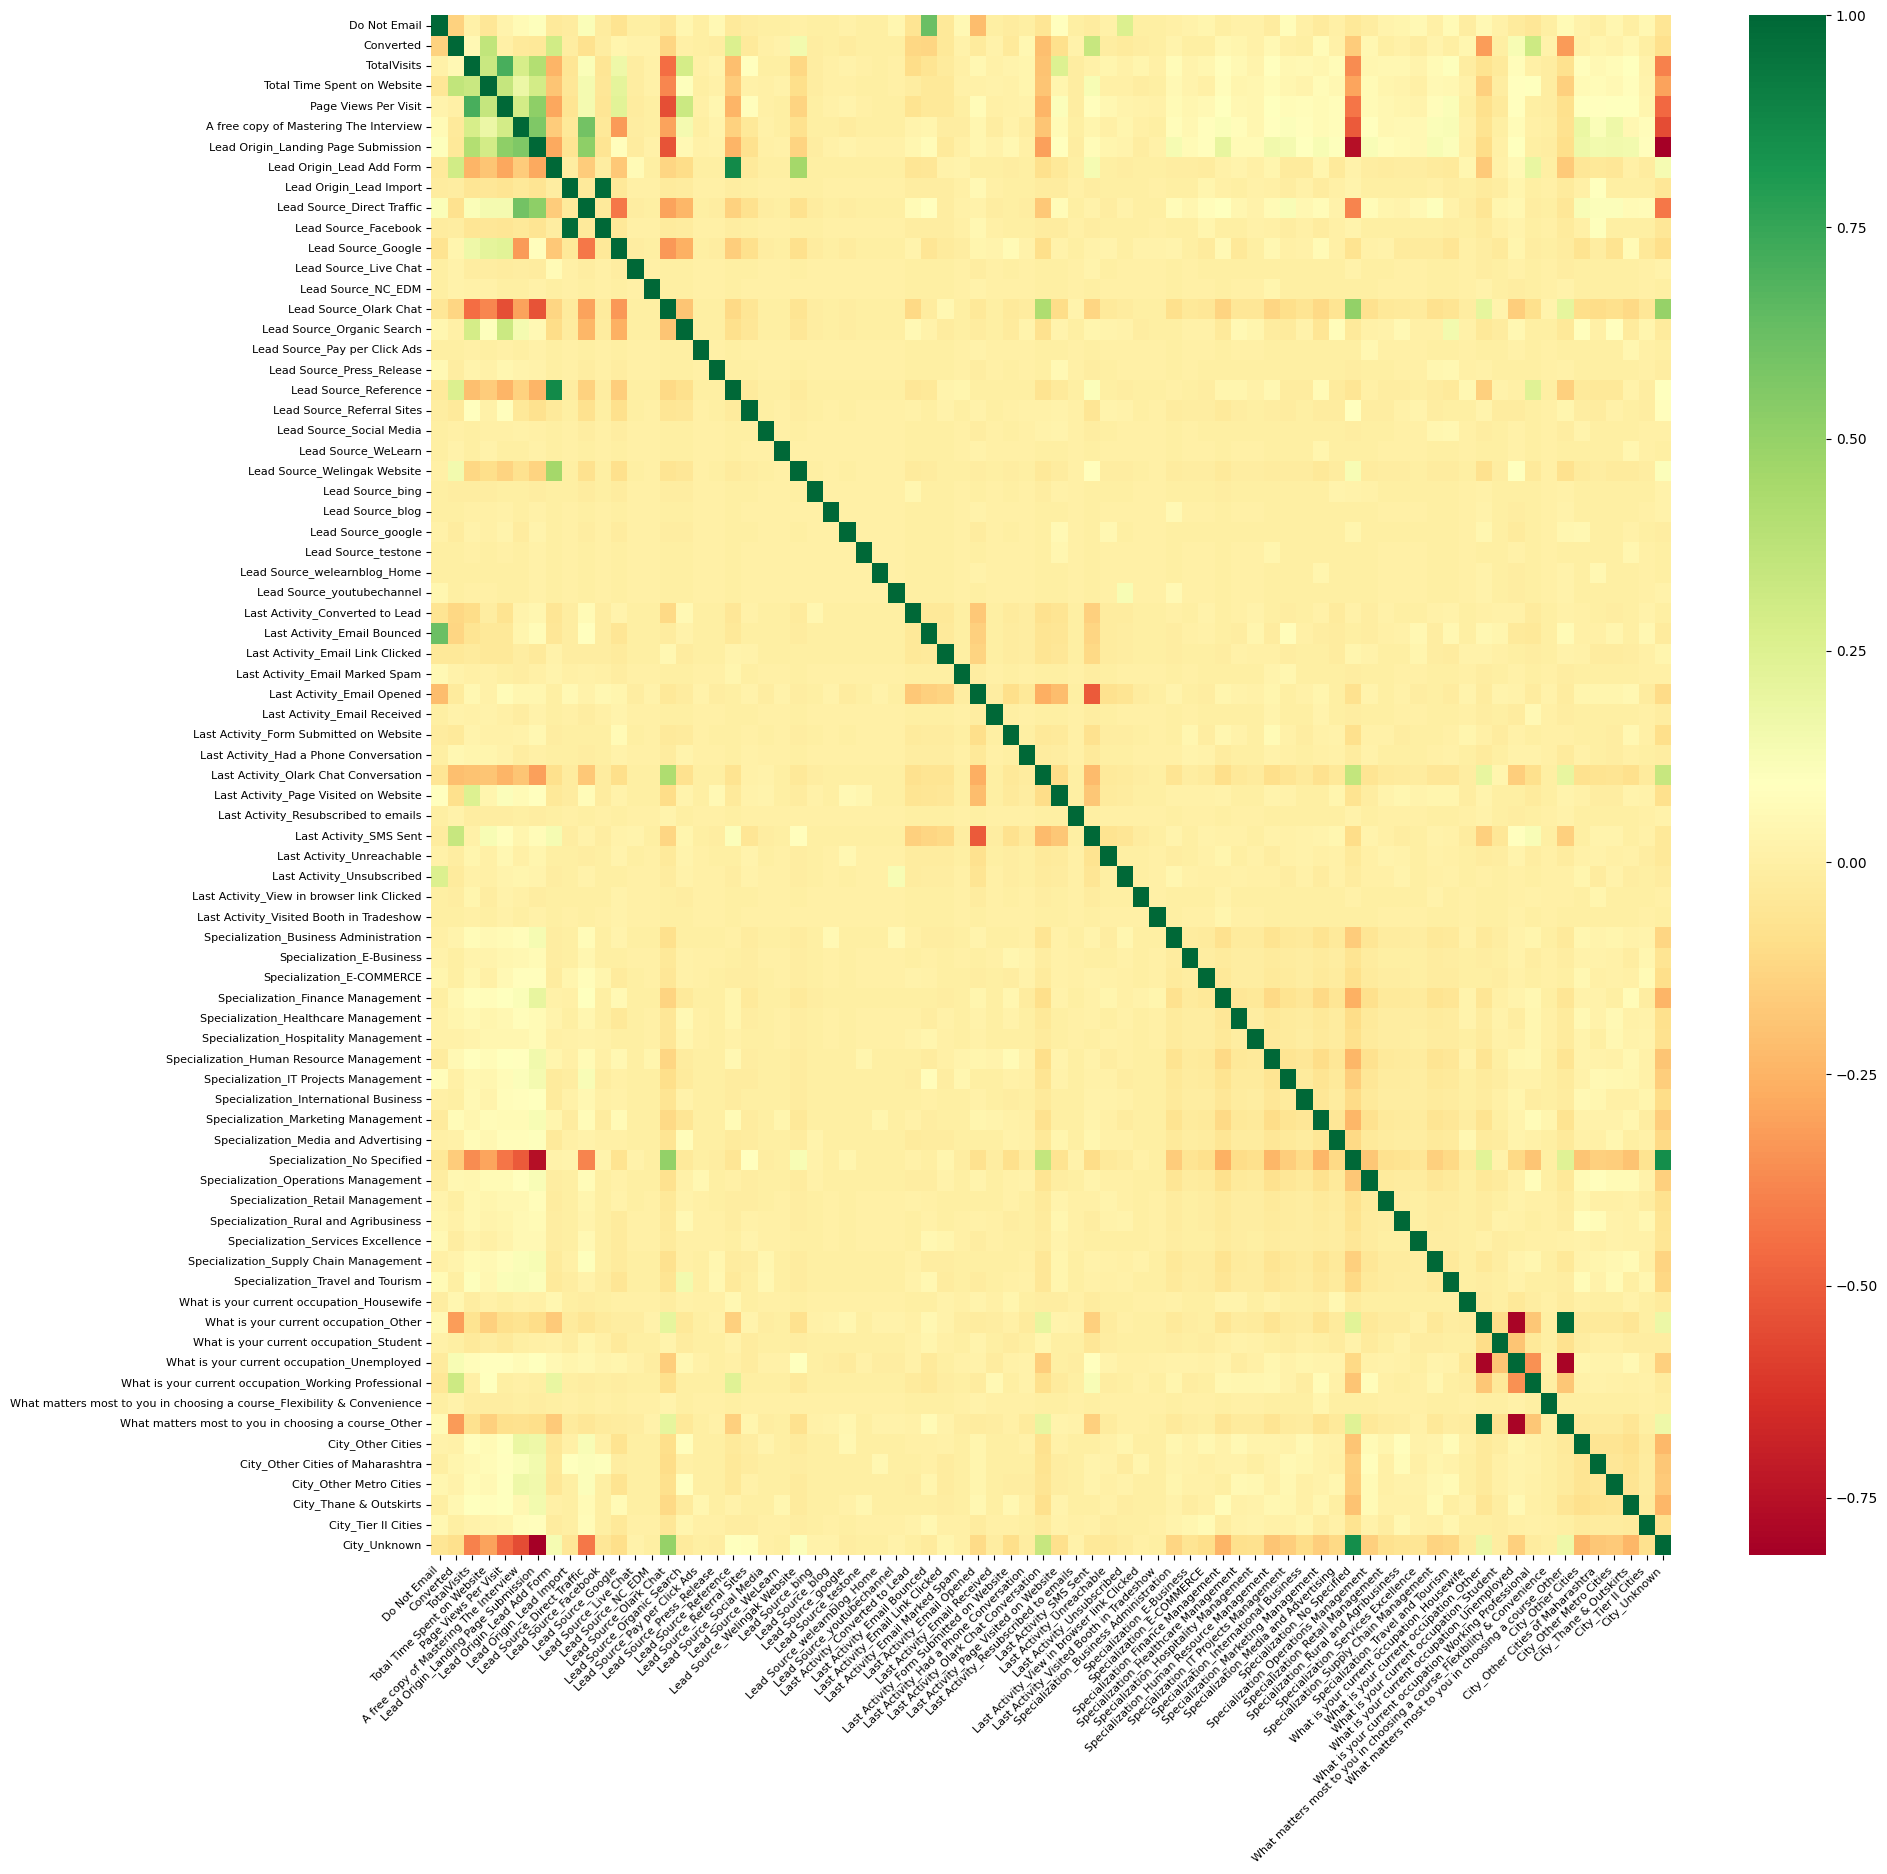

In [70]:
plt.figure(figsize = (20,20))  
sns.heatmap(lead_merged.corr(), cmap='RdYlGn')
plt.xticks(rotation=45, ha='right', size=8)
plt.yticks(size=8)
plt.show()

We have too many variables, so we just list the top variables with high correlation.

In [71]:
corr = lead_merged.corr()
corr.unstack().sort_values(ascending=False)[len(corr):].head(10)

What is your current occupation_Other                What matters most to you in choosing a course_Other    0.990775
What matters most to you in choosing a course_Other  What is your current occupation_Other                  0.990775
Lead Origin_Lead Import                              Lead Source_Facebook                                   0.983684
Lead Source_Facebook                                 Lead Origin_Lead Import                                0.983684
Lead Origin_Lead Add Form                            Lead Source_Reference                                  0.866191
Lead Source_Reference                                Lead Origin_Lead Add Form                              0.866191
Specialization_No Specified                          City_Unknown                                           0.852860
City_Unknown                                         Specialization_No Specified                            0.852860
TotalVisits                                          Page Views 

In [72]:
corr.unstack().sort_values(ascending=False)[len(corr):].tail(10)

A free copy of Mastering The Interview               City_Unknown                                          -0.548985
City_Unknown                                         A free copy of Mastering The Interview                -0.548985
Lead Origin_Landing Page Submission                  Specialization_No Specified                           -0.755381
Specialization_No Specified                          Lead Origin_Landing Page Submission                   -0.755381
What is your current occupation_Unemployed           What is your current occupation_Other                 -0.802505
What is your current occupation_Other                What is your current occupation_Unemployed            -0.802505
What matters most to you in choosing a course_Other  What is your current occupation_Unemployed            -0.802579
What is your current occupation_Unemployed           What matters most to you in choosing a course_Other   -0.802579
City_Unknown                                         Lead Origin

Although these variables are correlated with each other, we still keep them and then apply RFE to select features because we don't find any special relationship between them and we can leave out important information.

### 6.5 Test-Train Split

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [74]:
X = lead_merged.drop('Converted', axis= 1)
y = lead_merged['Converted']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### 6.6 Feature Scalling

In [76]:
scaler = StandardScaler()
X_train[num_var] = scaler.fit_transform(X_train[num_var])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_No Specified,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown
3009,0,-0.417238,-0.160255,-0.177298,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1012,1,-0.417238,-0.540048,-0.177298,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
9226,0,-1.034493,-0.888650,-1.183128,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4750,0,-0.417238,1.643304,-0.177298,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0
7987,0,0.508645,2.017593,0.074159,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [77]:
conversion_rate = (sum(lead['Converted'])/len(lead['Converted'].index))*100
conversion_rate

37.85541106458012

The current conversion rate is 37.85%

## 7. Model Building

### 7.1 Feature Selection

In [78]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

### Model 1

In [79]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6277
Model Family:                Binomial   Df Model:                           73
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 11 Aug 2023   Deviance:                   1.3705e+05
Time:                        18:33:08   Pearson chi2:                 6.70e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    4.776e+15   7.38e+07   6.47e+07      0.000    4.78e+15    4.78e+15
Do Not Email                                                            -1.123e+14   4.43e+06  -2.53e+07      0.000   -1.12e+14   -1.12e+14
TotalVisits                                                             -6.874e+12   1.28e+06  -5.36e+06      0.000   -6.87e+12   -6.87e+12
Total Time Spent on Website                                              8.082e+14   9.83e+05   8.22e+08      0.000    8.08e+14    8.08e+14
Page Views Per Visit                                                     -6.17e+13   1.42e+06  -4.34e+07      0.000   -6.17e+13   -6.17e+13
A free copy of Mastering The Interview                                  -1.148e+14   2.72e+06  -4.21e+07      0.000   -1.15e+14   -1.15e+14
Lead Origin_Landing Page Submission                                      2.607e+14   3.67e+06   7.11e+07      0.000    2.61e+14    2.61e+14
Lead Origin_Lead Add Form                                               -6.073e+14   4.76e+07  -1.28e+07      0.000   -6.07e+14   -6.07e+14
Lead Origin_Lead Import                                                  4.339e+15    6.9e+07   6.29e+07      0.000    4.34e+15    4.34e+15
Lead Source_Direct Traffic                                                -9.5e+14   6.16e+07  -1.54e+07      0.000    -9.5e+14    -9.5e+14
Lead Source_Facebook                                                    -4.053e+15   9.14e+07  -4.43e+07      0.000   -4.05e+15   -4.05e+15
Lead Source_Google                                                      -8.703e+14   6.15e+07  -1.41e+07      0.000    -8.7e+14    -8.7e+14
Lead Source_Live Chat                                                    1.117e+15   6.14e+07   1.82e+07      0.000    1.12e+15    1.12e+15
Lead Source_NC_EDM                                                       2.775e+15   9.11e+07   3.05e+07      0.000    2.78e+15    2.78e+15
Lead Source_Olark Chat                                                  -8.563e+14   6.14e+07  -1.39e+07      0.000   -8.56e+14   -8.56e+14
Lead Source_Organic Search                                              -9.385e+14   6.16e+07  -1.52e+07      0.000   -9.38e+14   -9.38e+14
Lead Source_Pay per Click Ads                                           -5.029e+15   9.12e+07  -5.52e+07      0.000   -5.03e+15   -5.03e+15
Lead Source_Press_Release                                               -5.806e+15   9.16e+07  -6.34e+07      0.000   -5.81e+15   -5.81e+15
Lead Source_Reference                                                    1.445e+15   3.91e+07    3.7e+07      0.000    1.45e+15    1.45e+15
Lea

In [80]:
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [81]:
rfe.support_

array([ True, False,  True, False, False,  True,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
        True, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False])

In [82]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 29),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 28),
 ('A free copy of Mastering The Interview', False, 31),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 44),
 ('Lead Source_Direct Traffic', False, 18),
 ('Lead Source_Facebook', False, 30),
 ('Lead Source_Google', False, 21),
 ('Lead Source_Live Chat', False, 25),
 ('Lead Source_NC_EDM', False, 4),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 20),
 ('Lead Source_Pay per Click Ads', False, 35),
 ('Lead Source_Press_Release', False, 54),
 ('Lead Source_Reference', False, 2),
 ('Lead Source_Referral Sites', False, 19),
 ('Lead Source_Social Media', False, 24),
 ('Lead Source_WeLearn', False, 60),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 43),
 ('Lead Source_blog', False, 40),
 ('Lead Source_google', False, 23),


In [83]:
col = X_train.columns[rfe.support_]

In [84]:
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Specialization_No Specified',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Other'],
      dtype='object')

In [85]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_Unreachab

### Model 2

In [86]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2544.7
Date:                Fri, 11 Aug 2023   Deviance:                       5089.5
Time:                        18:33:12   Pearson chi2:                 6.28e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4124
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1546      0.125     -1.237      0.216      -0.399       0.090
Do Not Email                                            -1.7822      0.186     -9.595      0.000      -2.146      -1.418
Total Time Spent on Website                              1.1114      0.041     27.120      0.000       1.031       1.192
Lead Origin_Landing Page Submission                     -0.9941      0.129     -7.727      0.000      -1.246      -0.742
Lead Origin_Lead Add Form                                3.0195      0.234     12.897      0.000       2.561       3.478
Lead Source_Olark Chat                                   1.2332      0.125      9.894      0.000       0.989       1.477
Lead Source_Welingak Website                             2.4995      0.756      3.305      0.001       1.017       3.982
Last Activity_Converted to Lead                         -1.2457      0.225     -5.547      0.000      -1.686      -0.806
Last Activity_Had a Phone Conversation                   2.6200      0.759      3.452      0.001       1.133       4.107
Last Activity_Olark Chat Conversation                   -1.3718      0.168     -8.154      0.000      -1.702      -1.042
Last Activity_SMS Sent                                   1.2700      0.076     16.671      0.000       1.121       1.419
Last Activity_Unsubscribed                               1.3869      0.473      2.932      0.003       0.460       2.314
Specialization_No Specified                             -0.9120      0.127     -7.207      0.000      -1.160      -0.664
What is your current occupation_Housewife               22.6444   1.54e+04      0.001      0.999   -3.01e+04    3.02e+04
What is your current occupation_Working Professional     2.4180      0.194     12.477      0.000       2.038       2.798
What matters most to you in choosing a course_Other     -1.2237      0.089    -13.722      0.000      -1.398      -1.049
========================================================================================================================
"""

In [87]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Specialization_No Specified,2.30
4,Lead Source_Olark Chat,2.07
2,Lead Origin_Landing Page Submission,1.73
14,What matters most to you in choosing a course_Other,1.62
3,Lead Origin_Lead Add Form,1.61
9,Last Activity_SMS Sent,1.59
8,Last Activity_Olark Chat Conversation,1.47
5,Lead Source_Welingak Website,1.37
1,Total Time Spent on Website,1.30
0,Do Not Email,1.19


In [88]:
#Drop What is your current occupation_Housewife because it has high p-value
col = col.drop('What is your current occupation_Housewife')

In [89]:
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Specialization_No Specified',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Other'],
      dtype='object')

### Model 3

In [90]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2548.7
Date:                Fri, 11 Aug 2023   Deviance:                       5097.4
Time:                        18:33:12   Pearson chi2:                 6.29e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4116
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1476      0.125     -1.183      0.237      -0.392       0.097
Do Not Email                                            -1.7852      0.186     -9.612      0.000      -2.149      -1.421
Total Time Spent on Website                              1.1107      0.041     27.131      0.000       1.030       1.191
Lead Origin_Landing Page Submission                     -0.9941      0.129     -7.735      0.000      -1.246      -0.742
Lead Origin_Lead Add Form                                3.0332      0.234     12.969      0.000       2.575       3.492
Lead Source_Olark Chat                                   1.2318      0.125      9.886      0.000       0.988       1.476
Lead Source_Welingak Website                             2.4850      0.756      3.286      0.001       1.003       3.967
Last Activity_Converted to Lead                         -1.2502      0.225     -5.568      0.000      -1.690      -0.810
Last Activity_Had a Phone Conversation                   2.6143      0.759      3.445      0.001       1.127       4.102
Last Activity_Olark Chat Conversation                   -1.3743      0.168     -8.169      0.000      -1.704      -1.045
Last Activity_SMS Sent                                   1.2650      0.076     16.615      0.000       1.116       1.414
Last Activity_Unsubscribed                               1.3847      0.473      2.928      0.003       0.458       2.312
Specialization_No Specified                             -0.9161      0.126     -7.245      0.000      -1.164      -0.668
What is your current occupation_Working Professional     2.4130      0.194     12.451      0.000       2.033       2.793
What matters most to you in choosing a course_Other     -1.2259      0.089    -13.753      0.000      -1.401      -1.051
========================================================================================================================
"""

In [91]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Specialization_No Specified,2.30
4,Lead Source_Olark Chat,2.07
2,Lead Origin_Landing Page Submission,1.73
13,What matters most to you in choosing a course_Other,1.62
3,Lead Origin_Lead Add Form,1.60
9,Last Activity_SMS Sent,1.59
8,Last Activity_Olark Chat Conversation,1.47
5,Lead Source_Welingak Website,1.37
1,Total Time Spent on Website,1.30
0,Do Not Email,1.19


Finally, all variables have low p-value and low VIF

In [92]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.072723
1012    0.037120
9226    0.609706
4750    0.673174
7987    0.914057
1281    0.757961
2880    0.034012
4971    0.962019
7536    0.870129
1248    0.899069
dtype: float64

In [93]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.07272323, 0.03711989, 0.6097057 , 0.67317433, 0.91405749,
       0.75796112, 0.03401169, 0.96201921, 0.87012898, 0.89906932])

In [94]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.072723,3009
1,0,0.037120,1012
2,0,0.609706,9226
3,1,0.673174,4750
4,1,0.914057,7987


Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [95]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.072723,3009,0
1,0,0.037120,1012,0
2,0,0.609706,9226,1
3,1,0.673174,4750,1
4,1,0.914057,7987,1


In [96]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3455  450]
 [ 710 1736]]


In [97]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.817351598173516


In [98]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [99]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7097301717089125

In [100]:
# Let us calculate specificity
TN / float(TN+FP)

0.8847631241997439

In [101]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.11523687580025609


In [102]:
# positive predictive value 
print (TP / float(TP+FP))

0.7941445562671546


In [103]:
# Negative predictive value
print (TN / float(TN+ FN))

0.82953181272509


#### With the cut-off point, the sensitivity is quite low (just 0.70), while the CEO expected that the conversion rate would be around 80%. So it can't meet the demand.

### 7.2 Plotting the ROC Curve

In [104]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [105]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

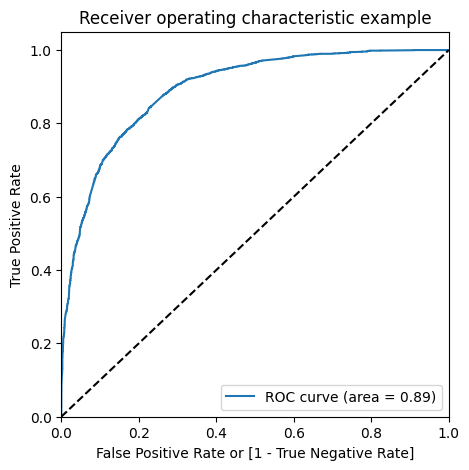

In [106]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### As the area under the curve is 0.89, we can determine the model is good

### 7.3 Finding Optimal Cutoff Point

In [107]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.072723,3009,0,1,0,0,0,0,0,0,0,0,0
1,0,0.037120,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.609706,9226,1,1,1,1,1,1,1,1,0,0,0
3,1,0.673174,4750,1,1,1,1,1,1,1,1,0,0,0
4,1,0.914057,7987,1,1,1,1,1,1,1,1,1,1,1


In [108]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.605574  0.986100  0.367222
0.2   0.2  0.766179  0.922322  0.668374
0.3   0.3  0.790427  0.879395  0.734699
0.4   0.4  0.811841  0.775143  0.834827
0.5   0.5  0.817352  0.709730  0.884763
0.6   0.6  0.809794  0.640229  0.916005
0.7   0.7  0.787120  0.532298  0.946735
0.8   0.8  0.760668  0.428046  0.969014
0.9   0.9  0.717367  0.286182  0.987452


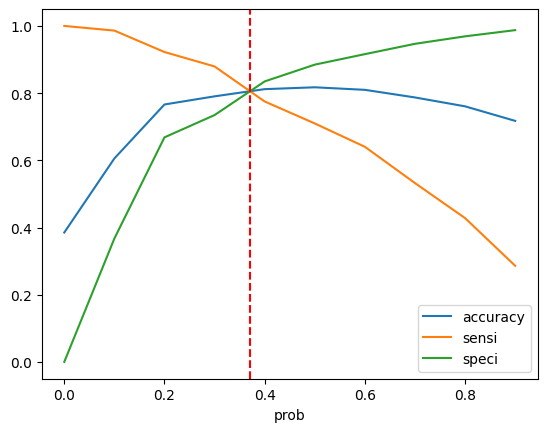

In [109]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.axvline(x=0.37, color='r', linestyle='--')
plt.show()

#### From the curve above, 0.37 is the optimum point to take it as a cutoff probability.

In [110]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.37 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.072723,3009,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.037120,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.609706,9226,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.673174,4750,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.914057,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [111]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8079042670445599

In [112]:
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion1

array([[3192,  713],
       [ 507, 1939]])

In [113]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [114]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7927228127555193

In [115]:
# Let us calculate specificity
TN / float(TN+FP)

0.8174135723431498

In [116]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.18258642765685018


In [117]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7311463046757164


In [118]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8629359286293593


#### At about a threshold of 0.37, the curves of accuracy, sensitivity and specificity intersect, and they all take a value of around 79-81%.

In [119]:
#Precision
confusion1[1,1]/(confusion1[0,1]+confusion1[1,1])

0.7311463046757164

In [120]:
#Recall
confusion1[1,1]/(confusion1[1,0]+confusion1[1,1])

0.7927228127555193

### 7.4 Precision and recall tradeoff

In [121]:
from sklearn.metrics import precision_recall_curve

In [122]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

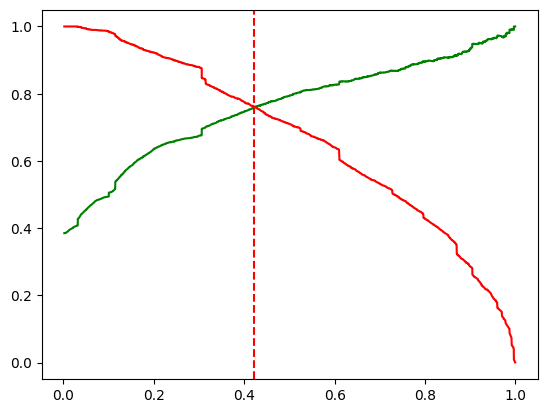

In [123]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.421, color='r', linestyle='--')
plt.show()

#### Applying the precision and recall method, we have the cut-off point is 0.42

In [124]:
y_train_pred_final['final_predicted_1'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,final_predicted_1
0,0,0.072723,3009,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0.037120,1012,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0.609706,9226,1,1,1,1,1,1,1,1,0,0,0,1,1
3,1,0.673174,4750,1,1,1,1,1,1,1,1,0,0,0,1,1
4,1,0.914057,7987,1,1,1,1,1,1,1,1,1,1,1,1,1


In [125]:
from sklearn.metrics import precision_score, recall_score

In [126]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted_1)

0.7592517283448557

In [127]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted_1)

0.7632869991823386

#### The Recall score is only 0.76, lower than the CEO's expectation of 80%. So we just keep the cut-off point at 0.37.

### 7.5 Assigning Lead Score

A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [128]:
y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].map(lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,final_predicted_1,Lead_Score
0,0,0.072723,3009,0,1,0,0,0,0,0,0,0,0,0,0,0,7
1,0,0.037120,1012,0,1,0,0,0,0,0,0,0,0,0,0,0,4
2,0,0.609706,9226,1,1,1,1,1,1,1,1,0,0,0,1,1,61
3,1,0.673174,4750,1,1,1,1,1,1,1,1,0,0,0,1,1,67
4,1,0.914057,7987,1,1,1,1,1,1,1,1,1,1,1,1,1,91


## 8. Model Evaluation

In [129]:
X_test[num_var] = scaler.transform(X_test[num_var])

In [130]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Activity_Unsubscribed,Specialization_No Specified,What is your current occupation_Working Professional,What matters most to you in choosing a course_Other
3271,0,-0.600595,0,0,0,0,0,0,0,0,0,1,0,1
1490,0,1.887326,1,0,0,0,0,0,0,0,0,0,1,0
7936,0,-0.752879,0,0,0,0,0,0,0,0,0,1,0,1
4216,0,-0.888650,0,1,0,0,0,0,0,0,0,0,0,0
3830,0,-0.587751,1,0,0,0,0,0,0,0,0,0,0,1


In [131]:
X_test_sm = sm.add_constant(X_test)

In [132]:
y_test_pred = res.predict(X_test_sm)

In [133]:
y_test_pred[:10]

3271    0.049419
1490    0.966673
7936    0.042053
4216    0.869731
3830    0.046513
1800    0.608061
6507    0.354164
4821    0.323247
4223    0.904430
4714    0.314352
dtype: float64

In [134]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)

In [135]:
y_test_df['Prospect ID'] = y_test_df.index

In [136]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [137]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.049419
1,1,1490,0.966673
2,0,7936,0.042053
3,1,4216,0.869731
4,0,3830,0.046513


In [138]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [139]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [140]:
y_pred_final.head()

,Converted,Prospect ID,Converted_Prob,final_predicted
0,0,3271,0.049419,0
1,1,1490,0.966673,1
2,0,7936,0.042053,0
3,1,4216,0.869731,1
4,0,3830,0.046513,0


In [141]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8116048475945649

In [142]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1428,  306],
       [ 207,  782]])

In [143]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [144]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7906976744186046

In [145]:
# Let us calculate specificity
TN / float(TN+FP)

0.8235294117647058

### Conclusion:

Finally, we have built Logisitc Regression model to predict customers who are potential to convert.
- The key variables to determine a potential customers or not are:
    + Do Not Email
    + Total Time Spent on Website
    + Lead Origin_Landing Page Submission
    + Lead Origin_Lead Add Form
    + Lead Source_Olark Chat
    + Lead Source_Welingak Website
    + Last Activity_Converted to Lead
    + Last Activity_Had a Phone Conversation
    + Last Activity_Olark Chat Conversation
    + Last Activity_SMS Sent
    + Last Activity_Unsubscribed
    + Specialization_No Specified
    + What is your current occupation_Working Professional
    + What matters most to you in choosing a course_Other
    
- On the train part:
    + Accuracy: 80,7%
    + Sensitivity: 79,3%
    + Specificity: 81,7%
- On the test part:
    + Accuracy: 81,1% 
    + Sensitivity: 79% 
    + Specificity: 82,3%
- The Area Under the Curve: 0.89

- The evaluation matrix of those is really close to each other, and combined with the area under the curve, it indicates how good the model we built is.
- Based on the converted probability, we can calculate the lead score to help the sales team choose the right customers and enhance their performance.
- The target conversion rate of the CEO is possible to reach.
